In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("./diabetes_data.csv")
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


# New section

**a**.

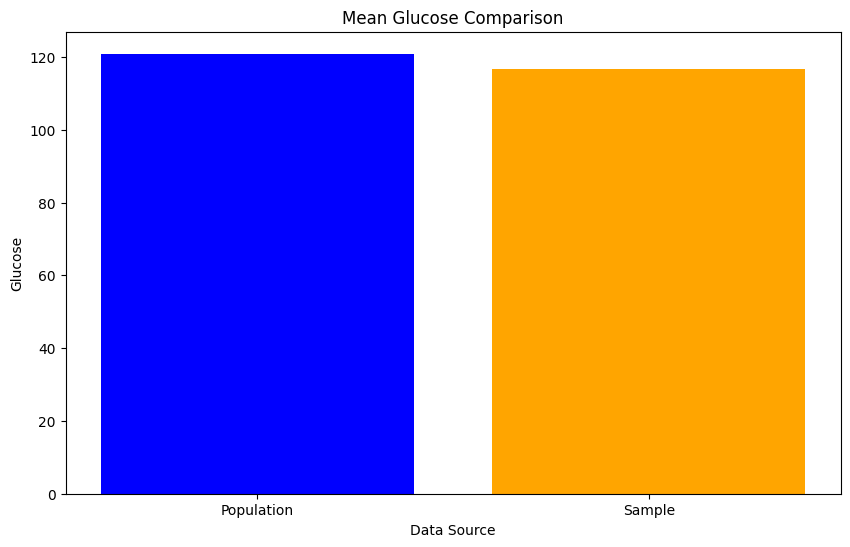

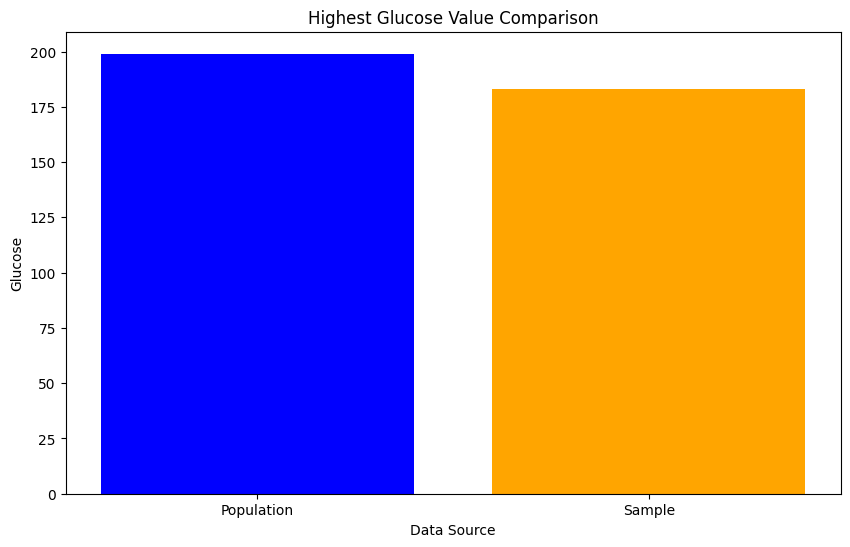

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
diabetes_data = pd.read_csv("diabetes_data.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample_data = diabetes_data.sample(n=25)

# Calculate mean and highest Glucose values for the sample
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()

# Calculate population statistics
population_mean_glucose = diabetes_data['Glucose'].mean()
population_max_glucose = diabetes_data['Glucose'].max()

# Plot comparison
plt.figure(figsize=(10, 6))

# Bar plot for mean Glucose
plt.bar(['Population', 'Sample'], [population_mean_glucose, sample_mean_glucose], color=['blue', 'orange'])
plt.title('Mean Glucose Comparison')
plt.xlabel('Data Source')
plt.ylabel('Glucose')
plt.show()

# Plot comparison
plt.figure(figsize=(10, 6))

# Bar plot for highest Glucose values
plt.bar(['Population', 'Sample'], [population_max_glucose, sample_max_glucose], color=['blue', 'orange'])
plt.title('Highest Glucose Value Comparison')
plt.xlabel('Data Source')
plt.ylabel('Glucose')
plt.show()



b.

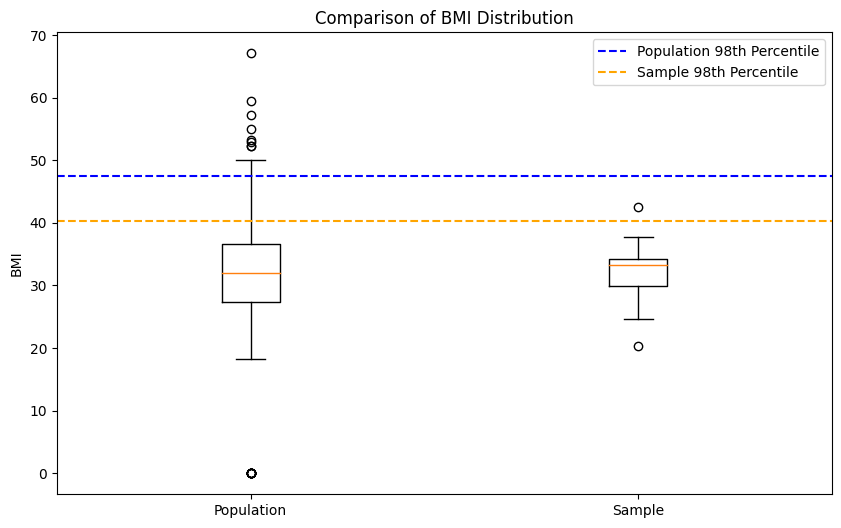

In [17]:
# Find the 98th percentile of BMI for the sample and the population
sample_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)

# Create a box plot for comparison
plt.figure(figsize=(10, 6))
plt.boxplot([diabetes_data['BMI'], sample_data['BMI']], labels=['Population', 'Sample'])
plt.title('Comparison of BMI Distribution')
plt.ylabel('BMI')

# Add red line for 98th percentile
plt.axhline(y=population_98th_percentile_bmi, color='blue', linestyle='--', label='Population 98th Percentile')
plt.axhline(y=sample_98th_percentile_bmi, color='orange', linestyle='--', label='Sample 98th Percentile')

plt.legend()
plt.show()

**c. Using Bootstrap**

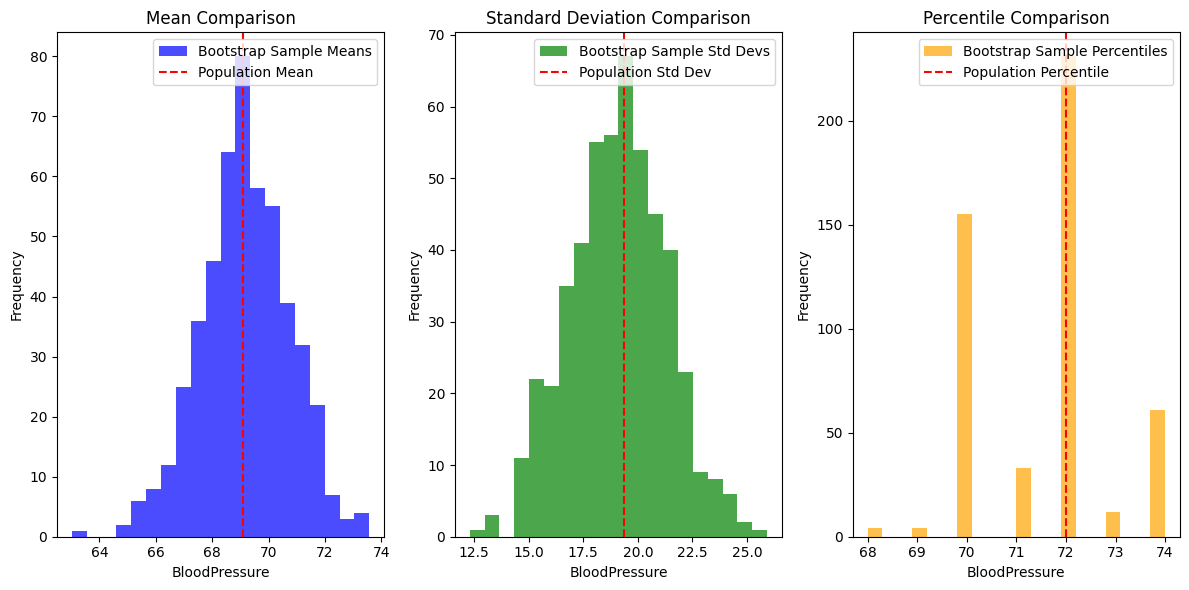

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
diabetes_data = pd.read_csv("diabetes_data.csv")

# Number of bootstrap samples
num_samples = 500

# Number of observations in each bootstrap sample
sample_size = 150

# Initialize arrays to store bootstrap statistics
bootstrap_means = np.zeros(num_samples)
bootstrap_std_devs = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

# Bootstrap resampling
for i in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = diabetes_data['BloodPressure'].sample(n=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 50)  # 50th percentile (median)

# Calculate statistics for the population
population_mean = diabetes_data['BloodPressure'].mean()
population_std_dev = diabetes_data['BloodPressure'].std()
population_percentile = np.percentile(diabetes_data['BloodPressure'], 50)  # 50th percentile (median)

# Create histograms for comparison
plt.figure(figsize=(12, 6))

# Histogram for mean
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=20, alpha=0.7, color='blue', label='Bootstrap Sample Means')
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Mean Comparison')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Histogram for standard deviation
plt.subplot(1, 3, 2)
plt.hist(bootstrap_std_devs, bins=20, alpha=0.7, color='green', label='Bootstrap Sample Std Devs')
plt.axvline(x=population_std_dev, color='red', linestyle='--', label='Population Std Dev')
plt.title('Standard Deviation Comparison')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Histogram for percentile
plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=20, alpha=0.7, color='orange', label='Bootstrap Sample Percentiles')
plt.axvline(x=population_percentile, color='red', linestyle='--', label='Population Percentile')
plt.title('Percentile Comparison')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
